<a href="https://colab.research.google.com/github/mprksa/Mangga/blob/main/Mangga_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [2]:
!git clone https://github.com/mprksa/Mangga.git

Cloning into 'Mangga'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 117 (delta 32), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (117/117), 1.98 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [105]:
# Fungsi untuk augmentasi gambar
def augment_image(image):
    # Rotasi acak
    angle = np.random.uniform(-15, 15)
    image = image.rotate(angle)
    # Penambahan kontras
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(np.random.uniform(0.8, 1.2))
    return image

# Fungsi untuk membaca dan mengaugmentasi gambar
def load_images_from_folder(folder, augment=False):
    images = []
    labels = []
    for label, category in enumerate(['mangga_matang', 'mangga_mentah', 'mangga_setengah_matang']):
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            img_path = os.path.join(category_folder, filename)
            try:
                image = Image.open(img_path)
                image = image.convert('RGB')  # Konversi ke RGB
                if augment:
                    image = augment_image(image)
                image = image.resize((64, 64))  # Ubah ukuran gambar jika perlu
                image_np = np.array(image).flatten()
                images.append(image_np)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {img_path}: {e}")
    return np.array(images), np.array(labels)

In [106]:
# Folder dataset
dataset_base_folder = 'Mangga'

In [107]:
# Membaca data train, test, dan validation
X_train, y_train = load_images_from_folder(os.path.join(dataset_base_folder, 'train'))
X_test, y_test = load_images_from_folder(os.path.join(dataset_base_folder, 'test'))
X_val, y_val = load_images_from_folder(os.path.join(dataset_base_folder, 'validation'))

In [108]:
# Augmentasi data train
X_train_augmented, y_train_augmented = load_images_from_folder(os.path.join(dataset_base_folder, 'train'), augment=True)

In [109]:
# Kombinasikan data asli dan augmentasi
X_train_combined = np.vstack((X_train, X_train_augmented))
y_train_combined = np.hstack((y_train, y_train_augmented))

In [110]:
# Tampilkan jumlah gambar di setiap set
print(f"Jumlah gambar di train set (asli): {len(X_train)}")
print(f"Jumlah gambar di train set (augmentasi): {len(X_train_augmented)}")
print(f"Jumlah total gambar di train set: {len(X_train_combined)}")
print(f"Jumlah gambar di test set: {len(X_test)}")
print(f"Jumlah gambar di validation set: {len(X_val)}")

Jumlah gambar di train set (asli): 15
Jumlah gambar di train set (augmentasi): 15
Jumlah total gambar di train set: 30
Jumlah gambar di test set: 15
Jumlah gambar di validation set: 15


In [111]:
# Inisialisasi dan training model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Inisialisasi Random Forest
rf.fit(X_train_combined, y_train_combined)

RandomForestClassifier(random_state=42)

In [112]:
# Evaluasi model pada train set
y_train_pred = tree.predict(X_train_combined)
train_accuracy = accuracy_score(y_train_combined, y_train_pred)
# Evaluasi model pada test set
y_test_pred = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
# Evaluasi model pada validation set
y_val_pred = tree.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [113]:
print(f"Akurasi pada train set: {train_accuracy:.2f}")
print(f"Akurasi pada test set: {test_accuracy:.2f}")
print(f"Akurasi pada validation set: {val_accuracy:.2f}")

Akurasi pada train set: 0.90
Akurasi pada test set: 1.00
Akurasi pada validation set: 1.00


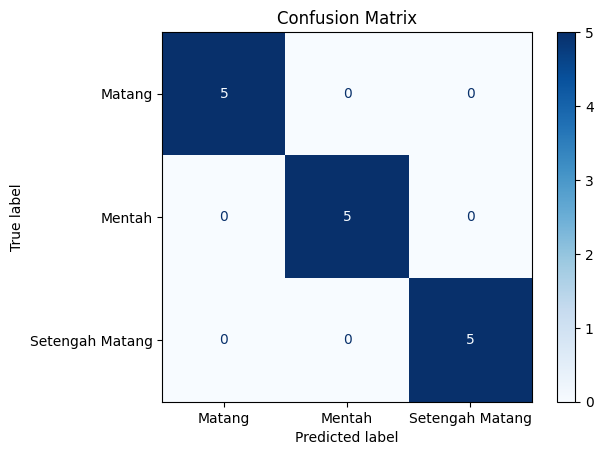

In [114]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Matang', 'Mentah', 'Setengah Matang']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [115]:
# Menampilkan classification report
print(classification_report(y_test, y_test_pred, target_names=['Matang', 'Mentah', 'Setengah Matang']))

                 precision    recall  f1-score   support

         Matang       1.00      1.00      1.00         5
         Mentah       1.00      1.00      1.00         5
Setengah Matang       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

